# Implementation 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('./data/Social_Network_Ads.csv')
X=df.iloc[:,2:-1].values
y=df.iloc[:,-1:].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/nancy/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

/home/nancy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[64,  4],
       [ 3, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


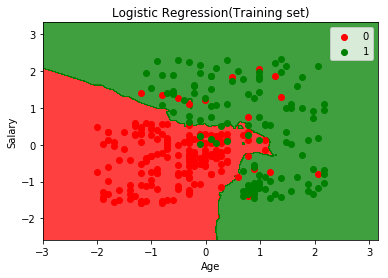

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


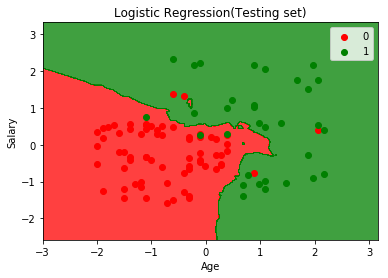

In [18]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(X_set[:,0].min()-1,X_set[:,0].max()+1,0.01),
                  np.arange(X_set[:,1].min()-1,X_set[:,1].max()+1,0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75
             ,cmap=ListedColormap((['red','green'])))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set[:,0]==j,0],X_set[y_set[:,0]==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression(Training set)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()  


X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(X_set[:,0].min()-1,X_set[:,0].max()+1,0.01),
                  np.arange(X_set[:,1].min()-1,X_set[:,1].max()+1,0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75
             ,cmap=ListedColormap((['red','green'])))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set[:,0]==j,0],X_set[y_set[:,0]==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression(Testing set)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show() 

# Questions 

## Is K-NN a linear model?
No, K-NN is a non linear model, as you will see in the practical sections of this course.

## What if we found equal number of neighbors? For example, if we choose K=6 and if we ﬁnd
3 data points in each category, where should we ﬁt the new data point?
The point is then assigned randomly to one of the two.

## What kind of business problems requires K-NN?
K-NN can be a good solution for Natural Language Processing. Also, K-NN
works well for non linear problems (when the data is non linearly separable), as you will see in this section
(Python or R).

## What number of neighbors should we choose?
The more you have neighbors, the more this team of neighbors has chance to ﬁnd correct predictions, and
therefore the more your model accuracy has chance to increase. However be careful, if you have too many
neighbors, that will cause overﬁtting on the training set and the predictions will be poor on new observations
in the test set.

